<a href="https://colab.research.google.com/github/a42437-ml/master_thesis_files/blob/main/ml_files/model_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install pandas numpy scikit-learn tensorflow matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving legit_traffic1.csv to legit_traffic1.csv
Saving covert_traffic1.csv to covert_traffic1.csv


In [ ]:
import pandas as pd

# Load the two CSV files
df_covert = pd.read_csv('/content/covert_traffic1.csv')  # change the filename if needed
df_legit = pd.read_csv('/content/legit_traffic1.csv')    # change the filename if needed

# Add labels: 1 for covert, 0 for legit
df_covert['covert_detected'] = 1
df_legit['covert_detected'] = 0

# Combine datasets
df = pd.concat([df_covert, df_legit], ignore_index=True)
df.head()


In [ ]:
import pandas as pd

# Load the full datasets
df_covert_full = pd.read_csv('/content/covert_traffic1.csv')
df_legit_full = pd.read_csv('/content/legit_traffic1.csv')

# Set number of calls to include
num_covert_calls = 500     # e.g., 200 calls = 400 legs/messages approx.
num_legit_calls = 2500     # adjust as needed

# Get unique Call-IDs
covert_call_ids = df_covert_full['Call-ID'].unique()[:num_covert_calls]
legit_call_ids = df_legit_full['Call-ID'].unique()[:num_legit_calls]

# Filter rows belonging to the selected calls
df_covert = df_covert_full[df_covert_full['Call-ID'].isin(covert_call_ids)].copy()
df_legit = df_legit_full[df_legit_full['Call-ID'].isin(legit_call_ids)].copy()

# Add labels
df_covert['covert_detected'] = 1
df_legit['covert_detected'] = 0

# Combine datasets
df = pd.concat([df_covert, df_legit], ignore_index=True)

# Show a preview
print(f"✅ Loaded {len(df_legit)} legit rows and {len(df_covert)} covert rows")
df.head()


✅ Loaded 16250 legit rows and 3500 covert rows


,src_ip,dst_ip,message_type,call_completion_status,call_duration_sec,Via,From,From_tag,To,To_tag,...,t,m,a,User-Agent,Identity,Attestation-Level,Origination-ID,boundary,smime signature,covert_detected
0,38.242.140.216,178.18.244.71,INVITE,Complete,10.04,Via: SIP/2.0/UDP 38.242.140.216:5080;branch=z9...,From: 854081310 <sip:854081310@38.242.140.216:...,58754SIPpTag001,To: 955954218 <sip:955954218@178.18.244.71:5080>,NaN,...,t=0 0,m=audio 6000 RTP/AVP 8,a=rtpmap:8 PCMA/8000,User-Agent: UA-Test-283,Identity: anp0M2Z4UDN5RFRl; info=<https://cert...,Attestation-Level: B,Origination-ID: ORIG-283,--secret_NEFMcnM0b2dIMnlr,SzhjZDRNaGRYOHhQ,1
1,178.18.244.71,38.242.140.216,100 Trying,NaN,NaN,Via: SIP/2.0/UDP 38.242.140.216:5080;branch=z9...,From: 854081310 <sip:854081310@38.242.140.216:...,58754SIPpTag001,To: 955954218 <sip:955954218@178.18.244.71:5080>,NaN,...,NaN,NaN,NaN,User-Agent: FreeSWITCH-mod_sofia/1.10.12-relea...,NaN,NaN,NaN,NaN,NaN,1
2,38.242.140.216,178.18.244.71,INVITE,Complete,10.04,Via: SIP/2.0/UDP 38.242.140.216:5080;branch=z9...,From: 301830044 <sip:301830044@38.242.140.216:...,58754SIPpTag002,To: 177205718 <sip:177205718@178.18.244.71:5080>,NaN,...,t=0 0,m=audio 6000 RTP/AVP 8,a=rtpmap:8 PCMA/8000,User-Agent: UA-Test-286,Identity: SnJROVJzZG9LRmhI; info=<https://cert...,Attestation-Level: B,Origination-ID: ORIG-286,--secret_V3dXRDVUR21tSFc5,dkZENlVNWm5OTXZJ,1
3,38.242.140.216,178.18.244.71,INVITE,Complete,10.06,Via: SIP/2.0/UDP 38.242.140.216:5080;branch=z9...,From: 647053985 <sip:647053985@38.242.140.216:...,58754SIPpTag003,To: 294823834 <sip:294823834@178.18.244.71:5080>,NaN,...,t=0 0,m=audio 6000 RTP/AVP 8,a=rtpmap:8 PCMA/8000,User-Agent: UA-Test-177,Identity: NTFUNk4zWk1EbUwy; info=<https://cert...,Attestation-Level: A,Origination-ID: ORIG-177,--secret_Vk41bHFrdXRFa3hj,SHE1dDdqVmRmMHBr,1
4,178.18.244.71,38.242.140.216,100 Trying,NaN,NaN,Via: SIP/2.0/UDP 38.242.140.216:5080;branch=z9...,From: 301830044 <sip:301830044@38.242.140.216:...,58754SIPpTag002,To: 177205718 <sip:177205718@178.18.244.71:5080>,NaN,...,NaN,NaN,NaN,User-Agent: FreeSWITCH-mod_sofia/1.10.12-relea...,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Remove 'covert_detected' from non-numeric list if it's there
if 'covert_detected' in non_numeric_cols:
    non_numeric_cols.remove('covert_detected')

print('Numeric columns:', numeric_cols)
print('Non-numeric columns:', non_numeric_cols)

# One-hot encode non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

# Fill missing values
df_encoded.fillna(0, inplace=True)

# Show a preview of the encoded dataset
display(df_encoded.head())

# Show all encoded column names
print("Encoded feature columns:", df_encoded.columns.tolist())




Numeric columns: ['call_duration_sec', 'covert_detected']
Non-numeric columns: ['src_ip', 'dst_ip', 'message_type', 'call_completion_status', 'Via', 'From', 'From_tag', 'To', 'To_tag', 'Call-ID', 'CSeq', 'Contact', 'X-', 'Subject', 'Max-Forwards', 'Content-Type', 'v', 'o', 's', 't', 'm', 'a', 'User-Agent', 'Identity', 'Attestation-Level', 'Origination-ID', 'boundary', 'smime signature']


,call_duration_sec,covert_detected,src_ip_178.18.244.71,src_ip_38.242.140.216,dst_ip_178.18.244.71,dst_ip_38.242.140.216,message_type_180 Ringing,message_type_200 OK,message_type_ACK,message_type_BYE,...,smime signature_eERyRzVPbjFnbW9R,smime signature_eHMxeThlWkxvR3Rl,smime signature_eUdUcnVubkU0b3Fj,smime signature_eUxvQzB4UU1OaFJH,smime signature_eVBpMWFVWGxoeUdB,smime signature_ejBNUnhHWGNBNFZn,smime signature_ek9DakJNQzhaTjRy,smime signature_ekpuQk1waU1EbFJv,smime signature_emZmeGNYbVFoOE1a,smime signature_enhQZFFMWUl1aWN4
0,10.04,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.00,1,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.04,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.06,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.00,1,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Encoded feature columns: ['call_duration_sec', 'covert_detected', 'src_ip_178.18.244.71', 'src_ip_38.242.140.216', 'dst_ip_178.18.244.71', 'dst_ip_38.242.140.216', 'message_type_180 Ringing', 'message_type_200 OK', 'message_type_ACK', 'message_type_BYE', 'message_type_INVITE', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK005c2KU62tyHS', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK006NUcX1KyUtF', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK00at0F4DQcgyr', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK01DX1vmvNmaZN', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK01FFmerjQU4gj', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK01KKSHZyt9rmB', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK01e6tNpQ6Q77B', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK02QZKQH89mgye', 'Via_Via: SIP/2.0/UDP 178.18.244.71:5080;rport;branch=z9hG4bK02pptyFDSHKNr', 'Via_Via: SIP/2.0/UDP 178.18.

In [ ]:
# Define features and labels
X = df_encoded.drop(columns=['covert_detected'])
y = df_encoded['covert_detected']

print('Features shape:', X.shape)
print('Labels shape:', y.shape)


Features shape: (19750, 39349)
Labels shape: (19750,)


In [ ]:
print(df_encoded['covert_detected'].value_counts())

covert_detected
0    16250
1     3500
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training shape:', X_train.shape)
print('Testing shape:', X_test.shape)


Training shape: (15800, 39349)
Testing shape: (3950, 39349)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8662 - loss: 0.3377 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 1.0000 - loss: 2.8232e-04 - val_accuracy: 1.0000 - val_loss: 8.8241e-04
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 1.0000 - loss: 4.4070e-05 - val_accuracy: 1.0000 - val_loss: 7.1434e-04
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 1.0000 - loss: 1.9930e-05 - val_accuracy: 1.0000 - val_loss: 6.5133e-04
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 1.0000 - loss: 1.1418e-05 - val_accuracy: 1.0000 - val_loss: 6.0775e-04
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 1.0000 - loss: 7.6147e-06 - val_accuracy: 1.0000 - val_loss: 5.7222e-04
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 1.0000 - loss: 5.5462e-06 - val_accuracy: 1.0000 - val_loss: 5.2985e-04
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 13

In [ ]:
# Evaluate performance on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 2.1983e-04
Test Accuracy: 1.0000


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       1.00      1.00      1.00       676

    accuracy                           1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950



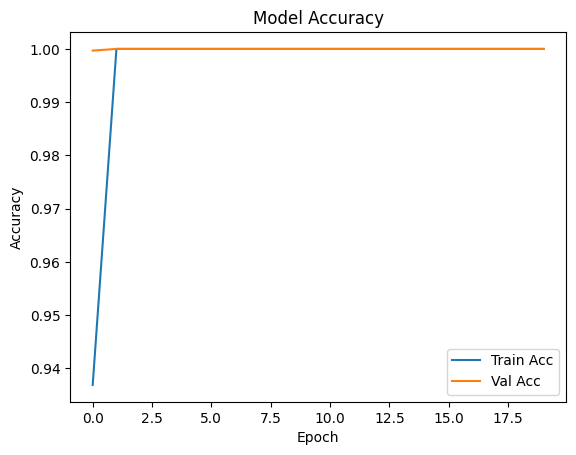

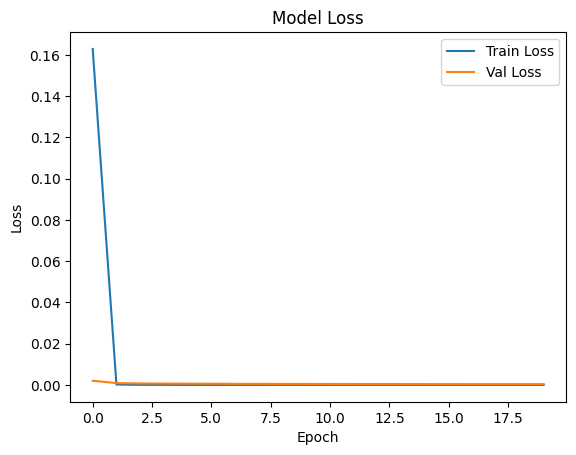

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       1.00      1.00      1.00       676

    accuracy                           1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950



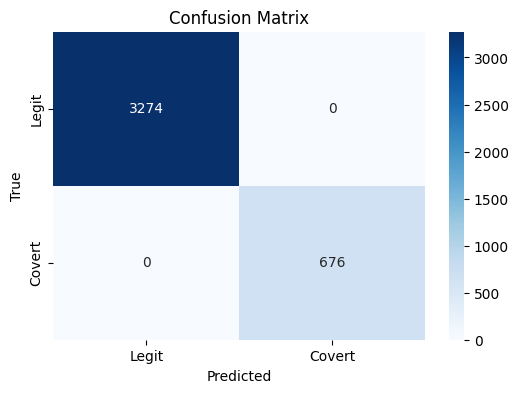

Saved classification report to classification_report.txt


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Show classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Covert'], yticklabels=['Legit', 'Covert'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Save classification report to a text file
with open("classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))
print("Saved classification report to classification_report.txt")


In [ ]:
# Save the trained model to a file
model.save('covert_detector_model_2500_500.h5')
print("Model saved as covert_detector_model_2000_200.h5")

Model saved as covert_detector_model_2000_200.h5
